In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_dir = r'/content/drive/MyDrive/AI-FELLOWSHIP/Landdataset/Train_data'
validation_dir = r'/content/drive/MyDrive/AI-FELLOWSHIP/Landdataset/Validation'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 612 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [13]:
images=[]
def read_images():
    print("loading images")
    for name in os.listdir(train_dir):
        for filename in os.listdir(train_dir+"/"+name): #join
            image = train_dir+"/"+name+"/"+filename
            images.append((image,name))
    return images

In [14]:
read_images()[0]

loading images


('/content/drive/MyDrive/AI-FELLOWSHIP/Landdataset/Train_data/land_used/land_used1.jpg',
 'land_used')

loading images


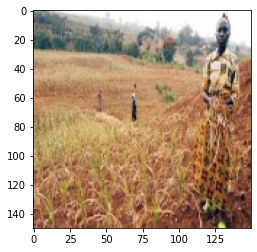

In [15]:
im=plt.imread(read_images()[12][0])
plt.imshow(im)

loading images


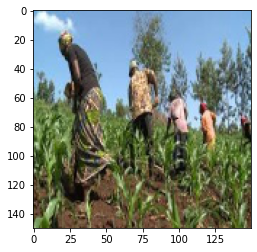

In [16]:
im=plt.imread(read_images()[18][0])
plt.imshow(im)

loading images


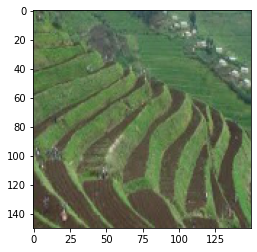

In [22]:
im=plt.imread(read_images()[117][0])
plt.imshow(im)

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [82]:
from tensorflow.keras.applications import VGG16
from keras.optimizer_v2 import adam as adam_v2
initial_lr = 0.00001
epochs=20
def _model():
    conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer = adam_v2.Adam(lr = initial_lr, decay = initial_lr/epochs),
              metrics=['acc'])
    return model

In [83]:
model=_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_16 (Dropout)        (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 18,910,017
Trainable params: 18,910,017


In [84]:
history = model.fit_generator(
      train_generator, 
      steps_per_epoch=612//32,
      epochs=20, 
      validation_data=validation_generator,
      validation_steps=164//32)

Epoch 1/20
19/19 [==============================] - 11s 491ms/step - loss: 0.7125 - acc: 0.5483 - val_loss: 0.5990 - val_acc: 0.7063
Epoch 2/20
19/19 [==============================] - 9s 473ms/step - loss: 0.6047 - acc: 0.6690 - val_loss: 0.5312 - val_acc: 0.7125
Epoch 3/20
19/19 [==============================] - 9s 472ms/step - loss: 0.5249 - acc: 0.7431 - val_loss: 0.4776 - val_acc: 0.7437
Epoch 4/20
19/19 [==============================] - 9s 488ms/step - loss: 0.4578 - acc: 0.7741 - val_loss: 0.4305 - val_acc: 0.7937
Epoch 5/20
19/19 [==============================] - 9s 471ms/step - loss: 0.4051 - acc: 0.8276 - val_loss: 0.3824 - val_acc: 0.8188
Epoch 6/20
19/19 [==============================] - 9s 470ms/step - loss: 0.3537 - acc: 0.8448 - val_loss: 0.3872 - val_acc: 0.8062
Epoch 7/20
19/19 [==============================] - 9s 471ms/step - loss: 0.3488 - acc: 0.8483 - val_loss: 0.3192 - val_acc: 0.8500
Epoch 8/20
19/19 [==============================] - 9s 470ms/step - loss: 0

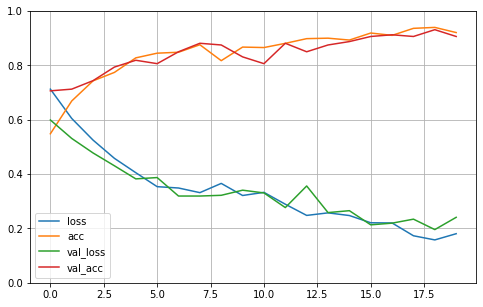

In [85]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.save("Land_model.h5") 

In [86]:
loss,acc=model.evaluate_generator(train_generator) 
acc

0.915032684803009

In [87]:
loss,test_acc=model.evaluate_generator(validation_generator)
test_acc

0.9085366129875183